# Exploratory Data Analysis

## Set Up

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # type: ignore
import numpy as np
import sys
import os

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *
from notebook_utils.exploratory import *

# Create combined dataframe from ghcn_clean files
dfs = combine_files_to_dfs("../data/ghcn_clean")
CA_stations_clean = pd.concat(dfs, ignore_index=True) # type: ignore

# add a datetime column for summary statistics
CA_stations_clean['datetime'] = pd.to_datetime(CA_stations_clean[['Year', 'Month', 'Day', 'Hour']])

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv


In [2]:
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,Year,Month,Day,Hour,Temperature,datetime
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,0,5.2,2003-01-01 00:00:00
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,1,5.0,2003-01-01 01:00:00
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,2,4.8,2003-01-01 02:00:00
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,3,4.6,2003-01-01 03:00:00
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,4,4.3,2003-01-01 04:00:00


# Summary Statistics

### Hourly Scale

In [3]:
by_hour = CA_stations_clean.groupby(['datetime'])['Temperature']
hourly_scale = by_hour.agg(['mean', 'median', 'std', 'min', 'max','count']).reset_index()
hourly_scale.columns = ['datetime', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature','temperature_count']

hourly_scale.head()

,datetime,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01-01 00:00:00,5.455844,5.2,2.380540,-3.0,11.1,77
1,2003-01-01 01:00:00,5.229870,5.0,2.275965,-2.0,10.0,77
2,2003-01-01 02:00:00,5.037662,4.8,2.320903,-2.0,11.0,77
3,2003-01-01 03:00:00,4.861039,4.6,2.618314,-3.0,16.0,77
4,2003-01-01 04:00:00,4.558442,4.3,2.455625,-2.0,13.0,77


### Daily Scale

In [4]:
by_day = CA_stations_clean.groupby(['datetime'])['Temperature']
daily_scale = by_day.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
daily_scale.columns = ['date', 'mean_temperature', 'median_temperature', 'std_temperature', 
                       'min_temperature', 'max_temperature', 'temperature_count']

# calculate daily range
daily_scale['temperature_range'] = daily_scale['max_temperature'] - daily_scale['min_temperature']

daily_scale.head()

,date,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count,temperature_range
0,2003-01-01 00:00:00,5.455844,5.2,2.380540,-3.0,11.1,77,14.1
1,2003-01-01 01:00:00,5.229870,5.0,2.275965,-2.0,10.0,77,12.0
2,2003-01-01 02:00:00,5.037662,4.8,2.320903,-2.0,11.0,77,13.0
3,2003-01-01 03:00:00,4.861039,4.6,2.618314,-3.0,16.0,77,19.0
4,2003-01-01 04:00:00,4.558442,4.3,2.455625,-2.0,13.0,77,15.0


### Monthly Scale

In [5]:
CA_stations_clean['year_month'] = CA_stations_clean['datetime'].dt.to_period('M')
by_month = CA_stations_clean.groupby(['year_month'])['Temperature']
monthly_scale = by_month.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
monthly_scale.columns = ['year_month', 'mean_temperature', 'median_temperature', 'std_temperature', 
                         'min_temperature', 'max_temperature', 'temperature_count']

monthly_scale.head()

,year_month,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003-01,11.245594,11.0,4.625416,-8.3,34.0,57994
1,2003-02,9.833316,10.5,4.854459,-8.5,28.0,52221
2,2003-03,12.317911,12.1,5.130811,-8.5,34.0,58021
3,2003-04,11.758784,11.9,4.706358,-8.3,33.0,56075
4,2003-05,16.083313,15.0,6.091342,-6.1,39.4,57979


### Seasonal Scale

In [6]:

CA_stations_clean['Season'] = CA_stations_clean['datetime'].dt.month.apply(assign_season)

by_season = CA_stations_clean.groupby(['Year', 'Season'])['Temperature']

seasonal_scale = by_season.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
seasonal_scale.columns = ['Year', 'Season', 'mean_temperature', 'median_temperature', 'std_temperature', 
                          'min_temperature', 'max_temperature', 'temperature_count']

seasonal_scale.head()

,Year,Season,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,Fall,16.065001,15.6,7.063128,-8.5,39.5,170204
1,2003,Spring,13.404421,13.0,5.682851,-8.5,39.4,172075
2,2003,Summer,21.008622,20.0,6.301059,-2.0,39.5,171293
3,2003,Winter,10.147132,10.4,4.753162,-8.5,34.0,167835
4,2004,Fall,15.486133,15.0,7.280780,-8.6,39.4,117894


### Yearly Scale

In [7]:
by_year = CA_stations_clean.groupby(['Year'])['Temperature']
yearly_scale = by_year.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
yearly_scale.columns = ['Year', 'mean_temperature', 'median_temperature', 'std_temperature', 
                        'min_temperature', 'max_temperature', 'temperature_count']

yearly_scale.head()

,Year,mean_temperature,median_temperature,std_temperature,min_temperature,max_temperature,temperature_count
0,2003,15.178252,14.2,7.206423,-8.5,39.5,681407
1,2004,15.332480,14.4,7.612098,-8.6,39.4,463382
2,2005,15.339870,14.5,7.457112,-8.6,39.6,514157
3,2006,15.342271,14.4,8.114380,-8.6,39.6,518736
4,2007,15.276496,14.6,8.000358,-8.6,39.6,548507


# Data Visualizations

In [8]:
cols = ['Station_ID', 'Station_name', 'Latitude', 'Longitude', 'datetime','Year', 'Month', 'Day', 'Hour', 'Temperature','Season']
CA_stations_clean = CA_stations_clean[cols]
CA_stations_clean.head()

,Station_ID,Station_name,Latitude,Longitude,datetime,Year,Month,Day,Hour,Temperature,Season
0,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 00:00:00,2003,1,1,0,5.2,Winter
1,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 01:00:00,2003,1,1,1,5.0,Winter
2,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 02:00:00,2003,1,1,2,4.8,Winter
3,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 03:00:00,2003,1,1,3,4.6,Winter
4,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003-01-01 04:00:00,2003,1,1,4,4.3,Winter


### Histograms

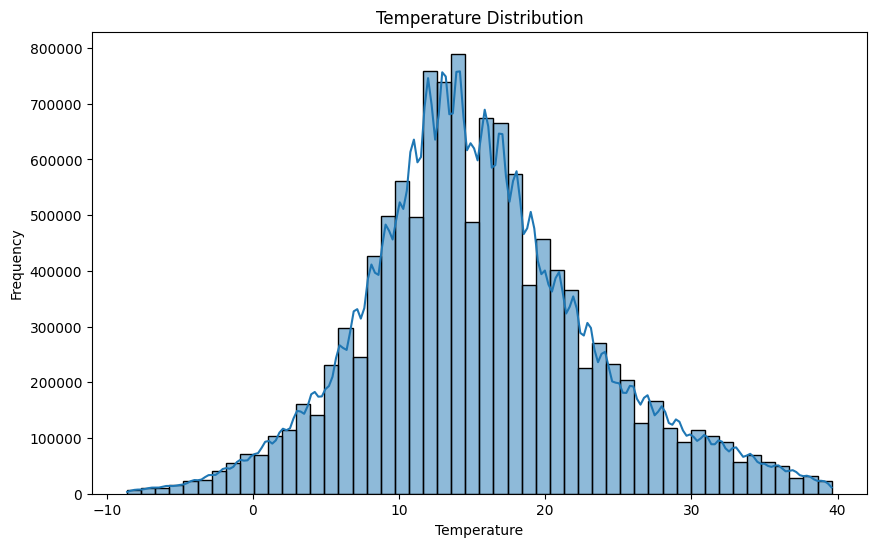

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(CA_stations_clean['Temperature'], bins=50, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### Boxplots

Hourly Temperature

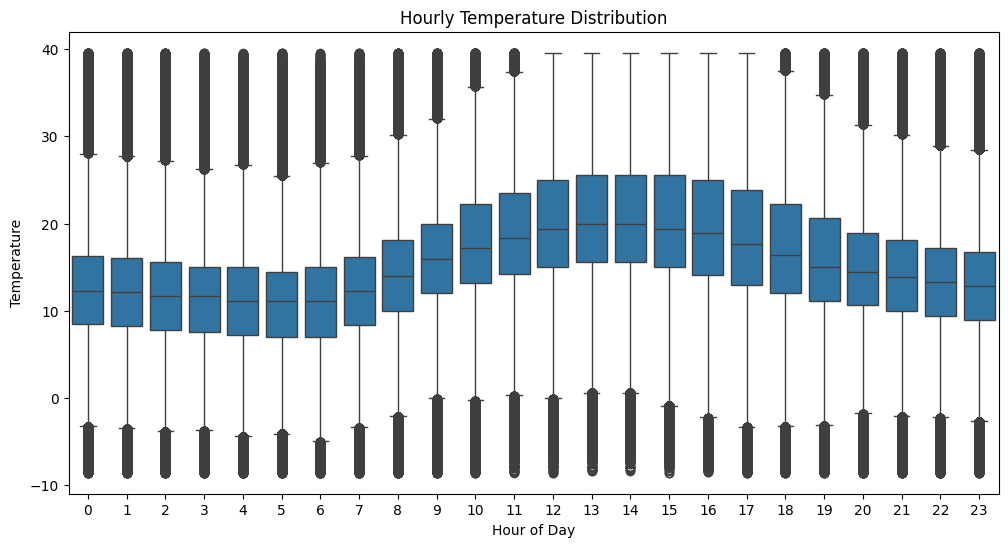

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Hour',y='Temperature', data=CA_stations_clean)
plt.title('Hourly Temperature Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.show()

Monthly Temperature

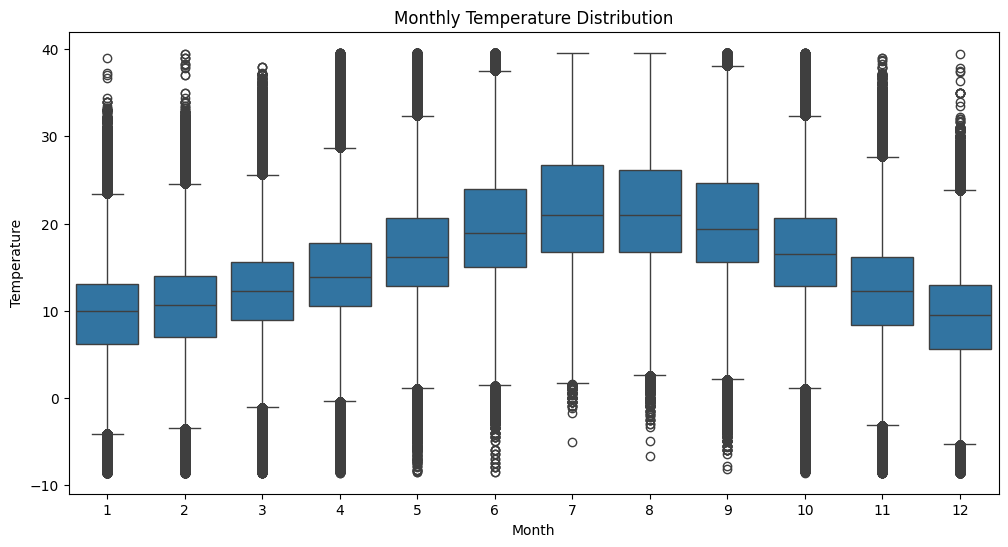

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature', data=CA_stations_clean)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

Seasonal Temperature

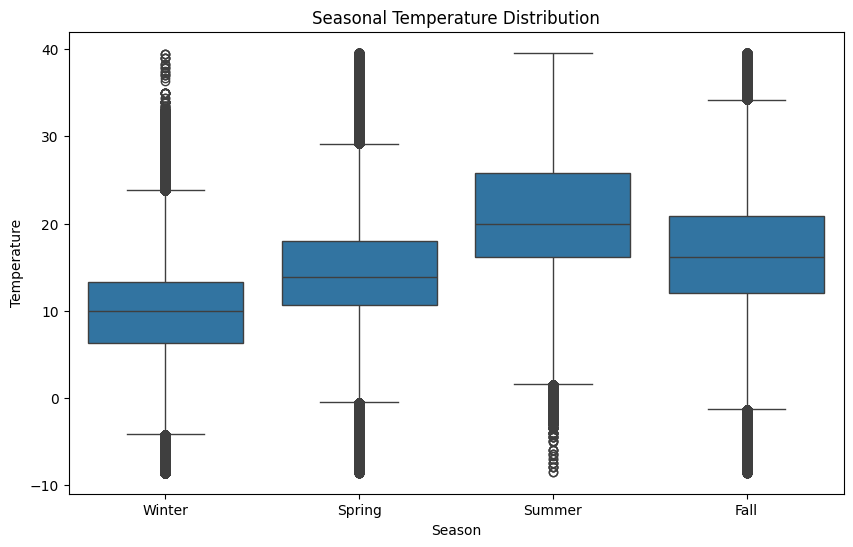

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Temperature', data=CA_stations_clean)
plt.title('Seasonal Temperature Distribution')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.show()

### Time series plots

Daily Average Temperature

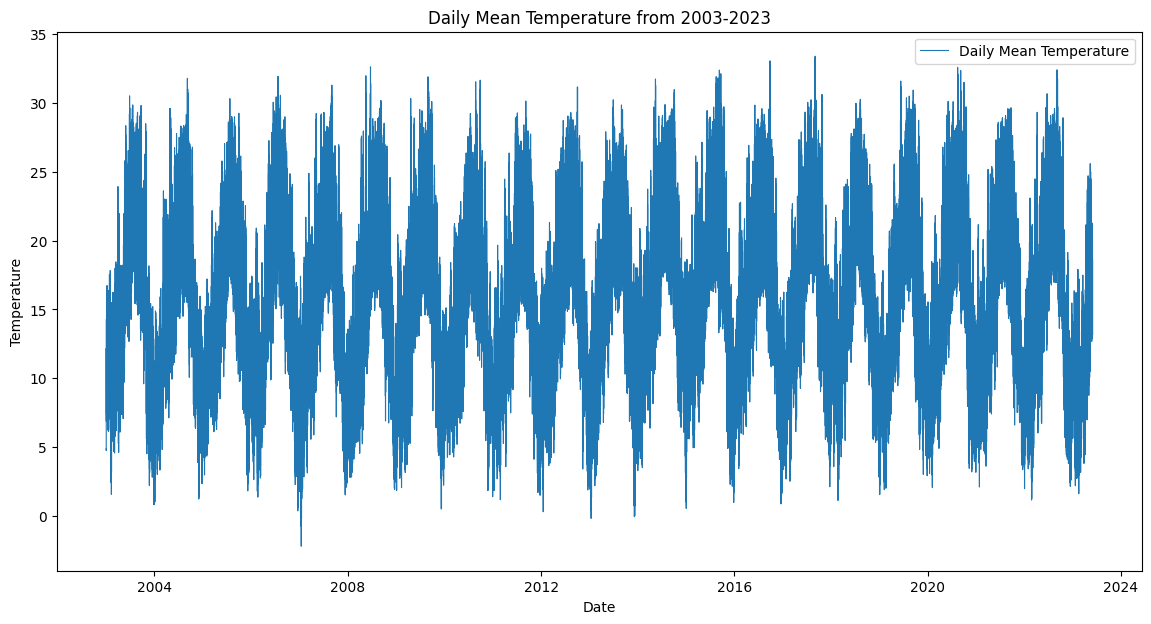

In [13]:
import matplotlib.dates as mdates

daily_scale['rolling_mean_temp'] = daily_scale['mean_temperature'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(daily_scale['date'], daily_scale['rolling_mean_temp'], label='Daily Mean Temperature',linewidth=0.8)
plt.title('Daily Mean Temperature from 2003-2023')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

Monthly Average Temperature

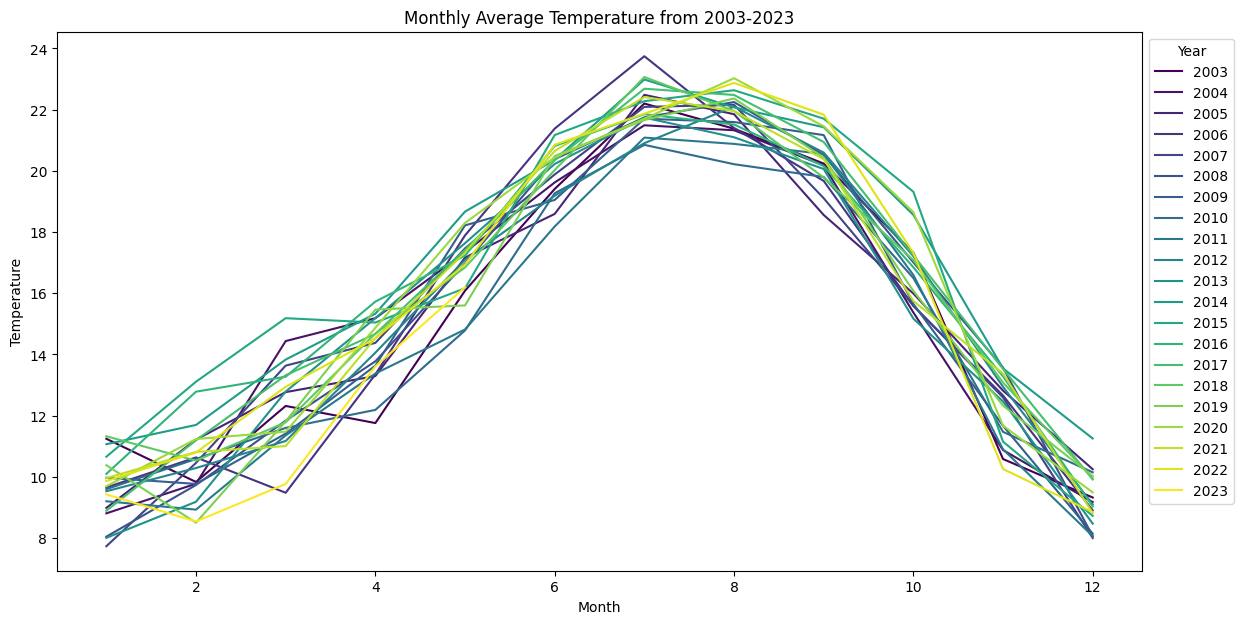

In [14]:
# Create new columns
monthly_scale = CA_stations_clean.groupby(['Year', 'Month'])['Temperature'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='mean', hue='Year', data=monthly_scale, palette='viridis',legend='full')
plt.title('Monthly Average Temperature from 2003-2023')
plt.xlabel('Month')
plt.ylabel('Temperature')

# move legend
plt.legend(title='Year',bbox_to_anchor=(1,1),loc='upper left')
plt.show()

Yearly Average Temperature

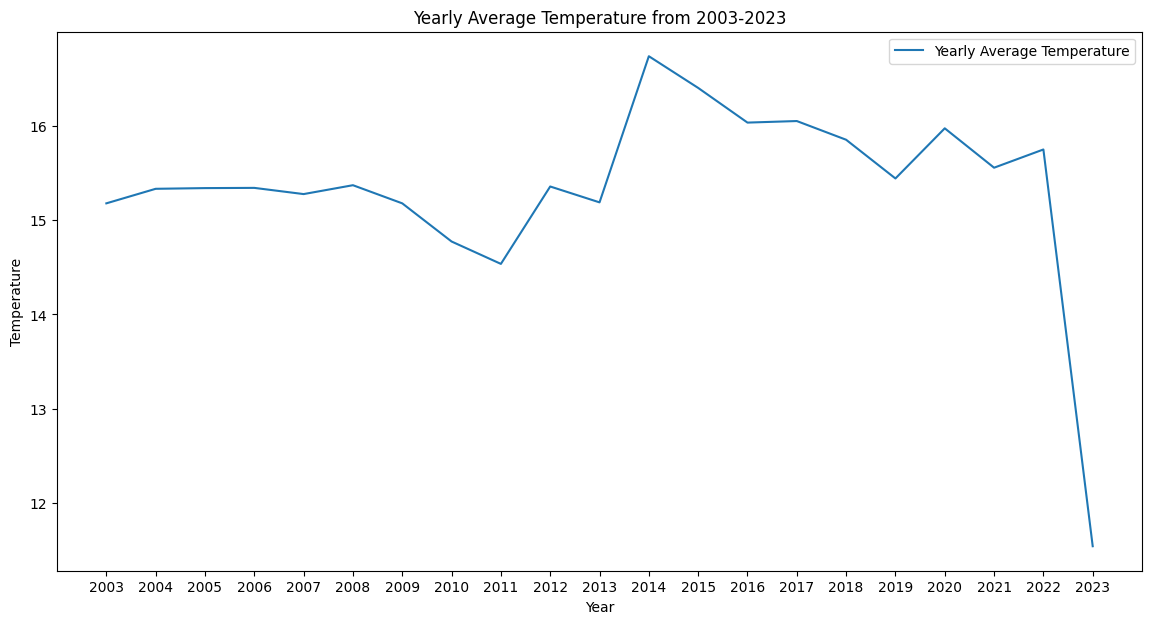

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_scale['Year'], yearly_scale['mean_temperature'], label='Yearly Average Temperature')
plt.title('Yearly Average Temperature from 2003-2023')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(yearly_scale['Year'].astype(int))
plt.legend()
plt.show()

# Diurnal Variations Analysis

Generate plots for all stations

Generate plots for all California cities

Generate plots for all California counties

## Representative stations

Calculate statistics for each station and get representative stations for:
- the station with the highest observed average temperature
- the station with the lowest observed average temperature
- the station with the highest observed temperature
- the station with the lowest observed temperature
- the station with the largest range of temperatures

In [16]:
# dictionary with representative stations: 
representative_stations = get_representative_stations(CA_stations_clean)

### Station with Highest Observed Average Temperature

In [ ]:
# show plot

### Station with Lowest Observed Average Temperature

In [ ]:
# show plot

### Station with Highest Observed Temperature

In [ ]:
# show plot

### Station with Lowest Observed Temperature

In [ ]:
# show plot

### Station with Largest Range of Temperatures

In [ ]:
# show plot